<h2> <b>ExNo:8</b> </h2>
<h2><b>Date:21-03-2024</b></h2>
<h2><b><center> Self Organizing Map </center></b> </h2> 

<h3>AIM</h3>
<p>To implement Self Organizing Map (SOM) to cluster the given data points.</p>

<h3>DESCRIPTION</h3>
<p>SOM provides a way of representing multidimensional data in much lower dimensional spaces - usually one or two dimensions. This process, of reducing the dimensionality of vectors, is essentially a data compression technique known as vector quantization. In addition, the Kohonen technique creates a network that stores information in such a way that any topological relationships within the training set are maintained. Each node has a specific topological position (an x, y coordinate in the lattice) and contains a vector of weights of the same dimension as the input vectors If the training data consists of vectors, V, of n dimensions: V1, V2, V3...Vn. Then each node will contain a corresponding weight vector W, of n dimensions: W1, W2, W3...Wn The lines connecting the nodes are only there to represent adjacency and do not signify a connection There are no lateral connections between nodes within the lattice. Neurons in an SOM do not have to be arranged in a 2D grid 1D, 3D or more dimensional arrangements can be used Distance can be defined in different ways Not necessary Euclidian distance. Different neighborhoods can be used rectangular, hexagonal, circular. The convergence of the network is not sensitive to the exact shape of the neighborhoods. To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU. 
</p>

<p>
The key idea introduced by Kohonen is the idea of neighbourhood. Each node has a set of neighbours. When this node wins a competition (the same as in the simple competitive net), not only is its weights adjusted, but those of the neighbours are also changed. They are not changed as much. The further the neighbour is from the winner, the smaller its weight change. Furthermore, as training goes on, the neighbourhood gradually shrinks. At the end of training, the neighbourhoods have shrunk to zero size. The neighbourhood idea immensely increases the power of the network. The network can create a kind of contour map of the patterns in the input data. Now the position of nodes becomes important. Neighbour nodes are associated with patterns in the input data set that are somehow together. Thus, not only are patterns in the data set recognized, some information about the relationships among these patterns is also displayed. There is still the problem of interpretation, of the meaning of these patterns and the relationships among them. Only humans can make such interpretations. Still,the Kohonen SOM is an amazing tool for decoding patterns and relationships in data, patterns which would otherwise remain invisible.
</p>
<p>
LEARNING ALGORITHM:

1. Each node's weights are initialized.
2. A vector is chosen at random from the set of training data and presented to the lattice.
3. Every node is examined to calculate which one's weights are most like the input vector.
The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighborhood of the BMU is now calculated. This is a value that
starts large, typically set to the 'radius' of the lattice, but diminishes each time-step. Any
nodes found within this radius are deemed to be inside the BMU's neighborhood.
5. Each neighboring node's weights are adjusted to make them more like the input vector.
The closer a node is to the BMU, the more its weights get altered.
6. Repeat from step 2 for N iterations.

</p>

<h3>QUESTIONS:</h3

1. Load the given dataset
2. Conduct the pre-processing steps, if required
3. Remove the target variable, if available in the dataset
4. Plot the datapoints using scatter plots.
5. Apply SOM clustering approach and cluster the datapoints into N number of clusters.
Determine the optimal number of clusters.
6. Print and plot the cluster centroids and cluster labels
7. Repeat the algorithm for ‘n’ number of clusters
8. Measure the performance using silhouette score and db score.
9. Print and plot the cluster centroids and cluster labels for ‘n’ number of clusters

In [4]:
!pip install minisom

You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Cluster centroids:
[[ 0.3287759   0.88667452  0.07228905  0.05742039]
 [ 0.23759317  0.74571385  0.10264551  0.09267435]
 [ 0.19756947  0.64249377  0.0658725   0.05535887]
 [ 0.19888401  0.59296659  0.10265874  0.16075869]
 [ 0.24724289  0.50107172  0.30864592  0.29763824]
 [ 0.42914848  0.33207011  0.69515766  0.87600621]
 [ 0.61371458  0.38409815  0.76273146  0.88158727]
 [ 0.60272324  0.53579884  0.77735221  0.94852458]
 [ 0.88498157  0.66932955  0.89467418  0.87694567]
 [ 0.92786225  0.3670566   0.92377486  0.85325991]
 [ 0.31696502  0.71995565  0.09257042  0.05580546]
 [ 0.29017209  0.60656027  0.0774038   0.06143627]
 [ 0.18423896  0.5863182   0.10196207  0.04355757]
 [ 0.10513478  0.61286576  0.05142172  0.06068981]
 [ 0.26810489  0.4343237   0.34920147  0.35698534]
 [ 0.40185673  0.28320982  0.68449922  0.76952666]
 [ 0.58934682  0.30227015  0.75705133  0.73905326]
 [ 0.60311407  0.44644195  0.73484428  0.76424549]
 [ 0.71129817  0.4768223   0.77198223  0.86869666]
 [ 0.8160629

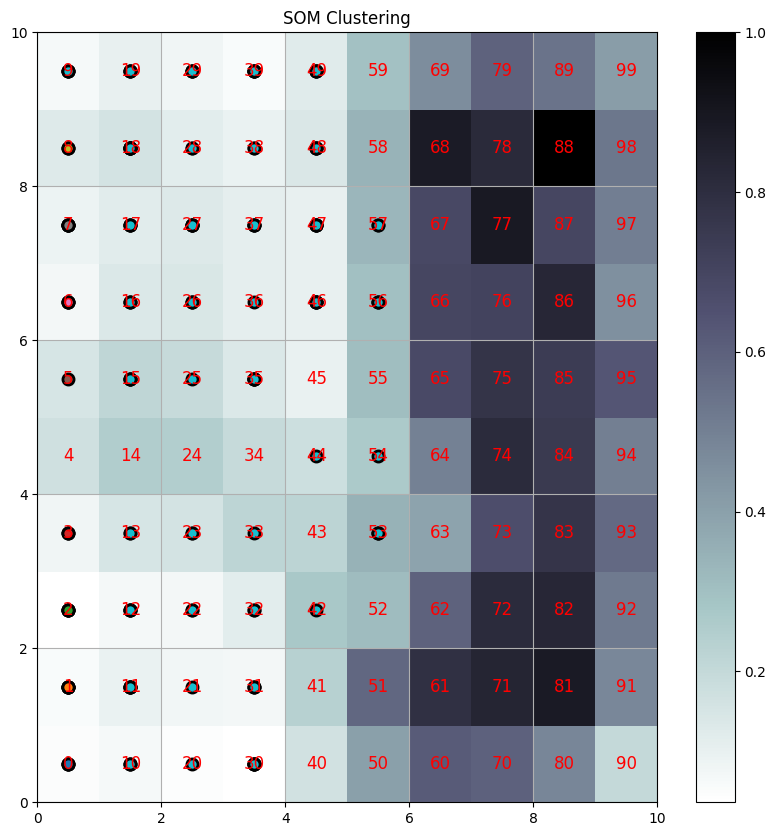

In [5]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# SOM grid size
grid_size = (10, 10)  # Adjust grid size as needed

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], X.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_batch(X_normalized, 1000)

# Get cluster centroids (approximation using SOM weights)
cluster_centroids = som.get_weights().reshape(-1, X.shape[1])

# Assign cluster labels to each data point
cluster_labels = np.zeros(len(X_normalized), dtype=int)
for i, x in enumerate(X_normalized):
    cluster_labels[i] = np.argmin([np.linalg.norm(x - w) for w in cluster_centroids])

# Print cluster centroids
print("Cluster centroids:")
print(cluster_centroids)

# Print cluster labels
print("Cluster labels:")
print(cluster_labels)

# Plot the SOM grid and cluster centroids
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot distance map
plt.colorbar()

# Plot data points
for i, x in enumerate(X_normalized):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.tab10(cluster_labels[i]),
             markeredgecolor='k', markersize=8, markeredgewidth=2)

# Plot cluster centroids
for i, cc in enumerate(cluster_centroids):
    w = som.winner(cc)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color='r', fontsize=12, ha='center', va='center')

plt.title('SOM Clustering')
plt.grid()
plt.show()


In [6]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# SOM grid size
grid_size = (10, 10)  # Adjust grid size as needed

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], X.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_batch(X_normalized, 1000)

# Get cluster centroids (approximation using SOM weights)
cluster_centroids = som.get_weights().reshape(-1, X.shape[1])

# Number of clusters to try
n_clusters_range = range(2, 11)

# Results storage
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Assign cluster labels to each data point
    cluster_labels = np.zeros(len(X_normalized), dtype=int)
    for i, x in enumerate(X_normalized):
        cluster_labels[i] = np.argmin([np.linalg.norm(x - w) for w in cluster_centroids[:n_clusters]])

    # Compute silhouette score
    silhouette_scores.append(silhouette_score(X_normalized, cluster_labels))

# Plot silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Optimal number of clusters
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_n_clusters)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Cluster centroids for 2 clusters:
[[-0.05588482 -0.69575519 -0.34079649  0.62980792]
 [ 0.45690964  0.4242868  -0.5736653  -0.52888993]]
Cluster labels for 2 clusters:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


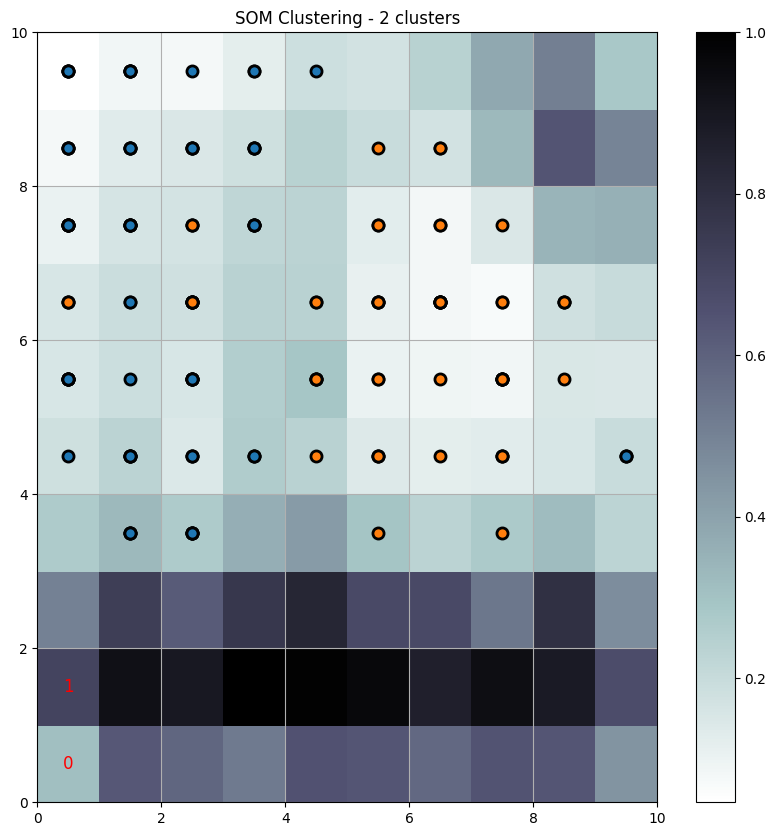

Cluster centroids for 3 clusters:
[[0.20996732 0.67021368 0.09297406 0.15352958]
 [0.2470433  0.76320654 0.10382185 0.09269424]
 [0.33319539 0.89801377 0.07225446 0.05072402]]
Cluster labels for 3 clusters:
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


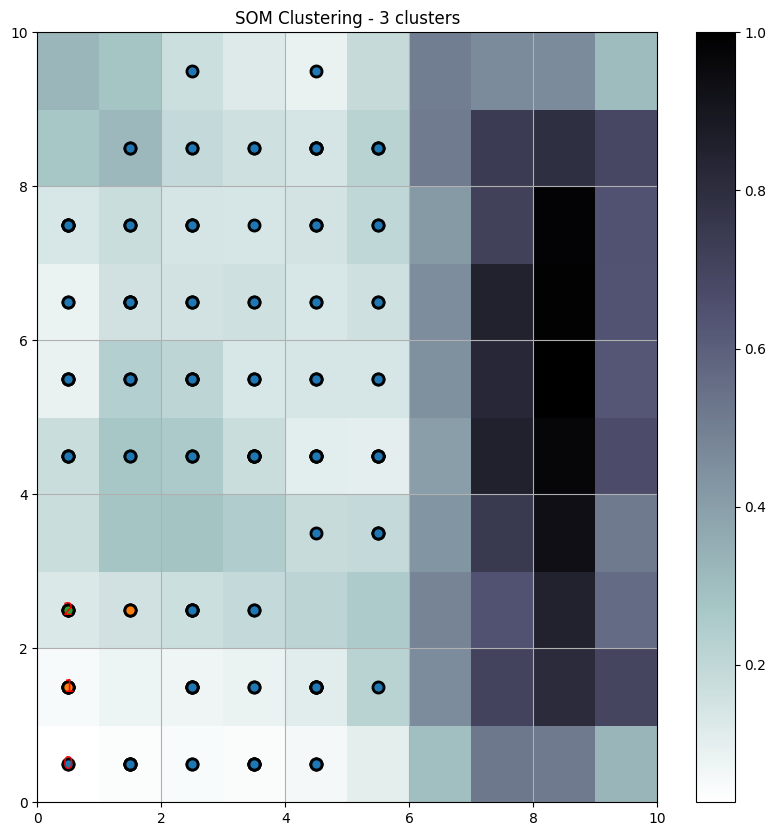

Cluster centroids for 4 clusters:
[[ 0.36203303 -0.63540595 -0.42831882 -0.52863221]
 [ 0.16593841  0.62514232 -0.64732349 -0.39964972]
 [-0.03850233  0.71098251  0.59310539  0.37442026]
 [ 0.45987888 -0.78296962  0.06542263  0.41279853]]
Cluster labels for 4 clusters:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


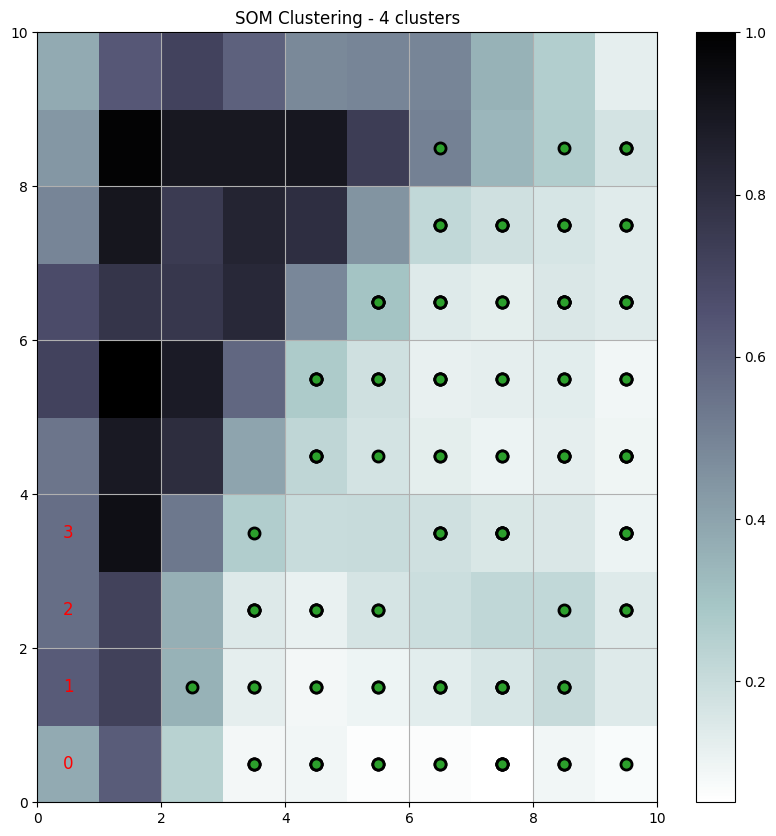

Cluster centroids for 5 clusters:
[[ 0.3468029   0.25847056 -0.18327959  0.88219384]
 [-0.41364025  0.59659723 -0.59549344  0.28441432]
 [-0.44780683  0.55079427  0.26202375 -0.1030974 ]
 [-0.09987899  0.19850082  0.07346928  0.08705613]
 [ 0.08651185  0.30227487 -0.05144085 -0.0780735 ]]
Cluster labels for 5 clusters:
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 0 0 0 3 0 3 0 3 0 3 3 0 3 0 3 0 0 3 0 3 0 0 0 3
 0 0 0 0 0 3 3 3 3 0 0 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


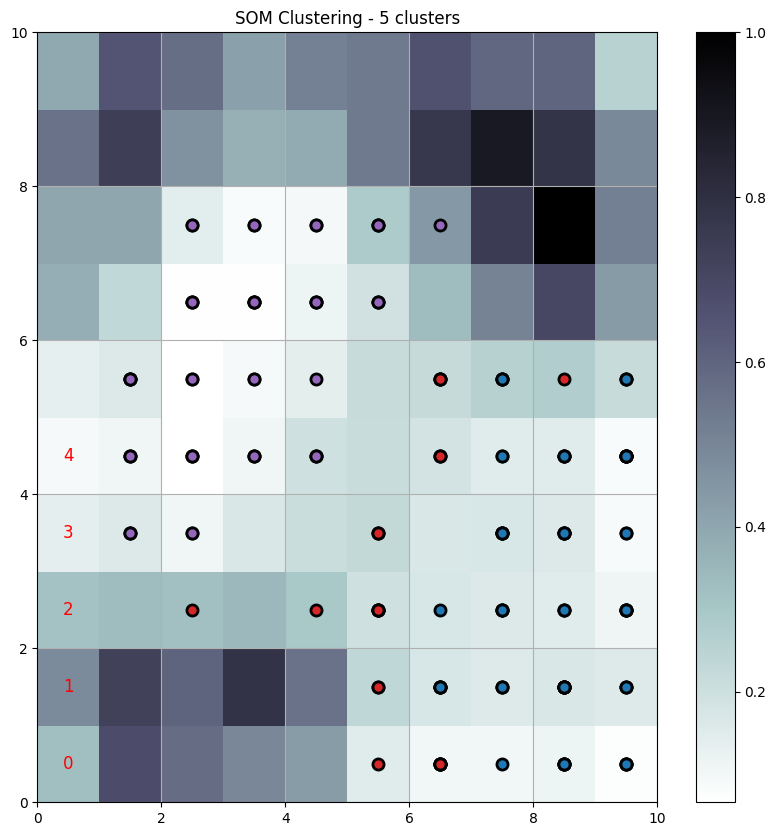

Cluster centroids for 6 clusters:
[[-0.38984964 -0.21191471  0.45833004 -0.76964226]
 [ 0.46144258 -0.4560151  -0.54424342  0.45559165]
 [ 0.07982724  0.50502047  0.40989059 -0.04252409]
 [ 0.22949527  0.75726899  0.09026904  0.05701865]
 [ 0.33345151  0.8997377   0.07209199  0.05073926]
 [ 0.34738098  0.7385481   0.09969819  0.06579812]]
Cluster labels for 6 clusters:
[3 3 3 3 3 5 3 3 2 3 5 3 3 2 4 4 5 3 5 3 5 3 3 3 3 3 3 3 3 3 3 5 4 4 3 3 5
 3 2 3 3 2 3 3 3 3 3 3 3 3 5 5 5 2 2 2 5 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2
 2 5 2 5 2 2 2 2 2 2 2 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 5 2 2 2 5 5
 2 5 2 2 5 2 5 2 2 5 2 2 2 5 5 2 2 2 5 2 5 2 2 2 5 5 2 2 5 5 5 2 5 5 5 2 5
 5 2]


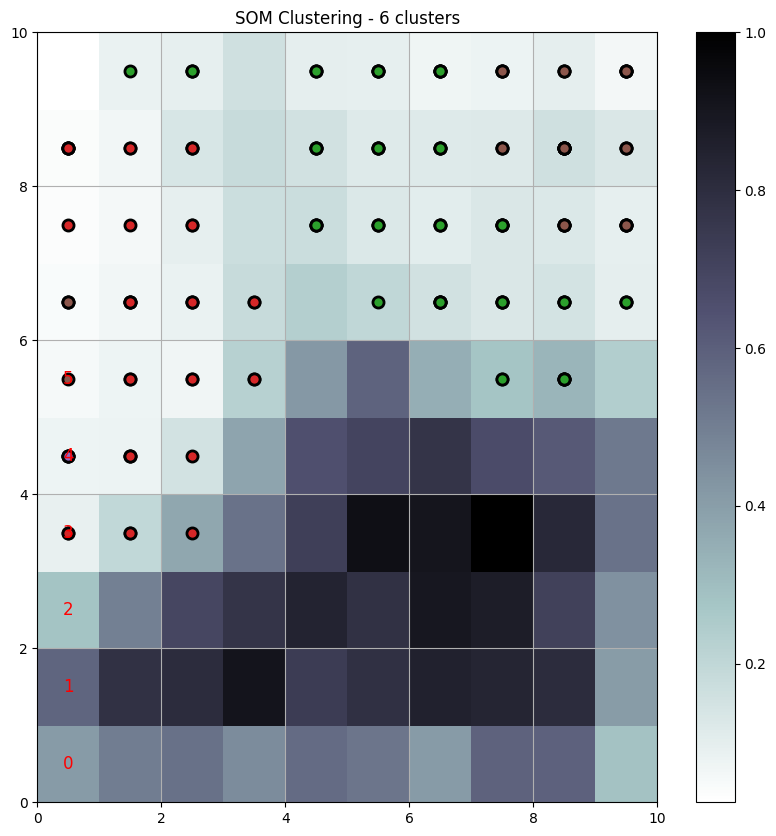

Cluster centroids for 7 clusters:
[[ 0.14399063  0.37607077  0.47125279  0.69723685]
 [ 0.24309962  0.28518073  0.59620876  0.64862224]
 [ 0.52511425  0.24383468  0.66151771  0.61259079]
 [ 0.52540814  0.10854748  0.6145587   0.55955499]
 [ 0.50238585 -0.10619667  0.39089732  0.42479551]
 [-0.54261518  0.41948121  0.24772933  0.57701563]
 [-0.65164706  0.40356514 -0.36686001  0.52165401]]
Cluster labels for 7 clusters:
[0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 4 0 0 0 0 0 0 0 0 2 2 2 3 2 2 2 1 2 1 4 2 3 2 1 2 1 3 3 3 2 2 2 2
 2 2 2 2 2 3 3 3 2 2 1 2 2 3 1 1 1 2 3 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 1 2 2 2 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


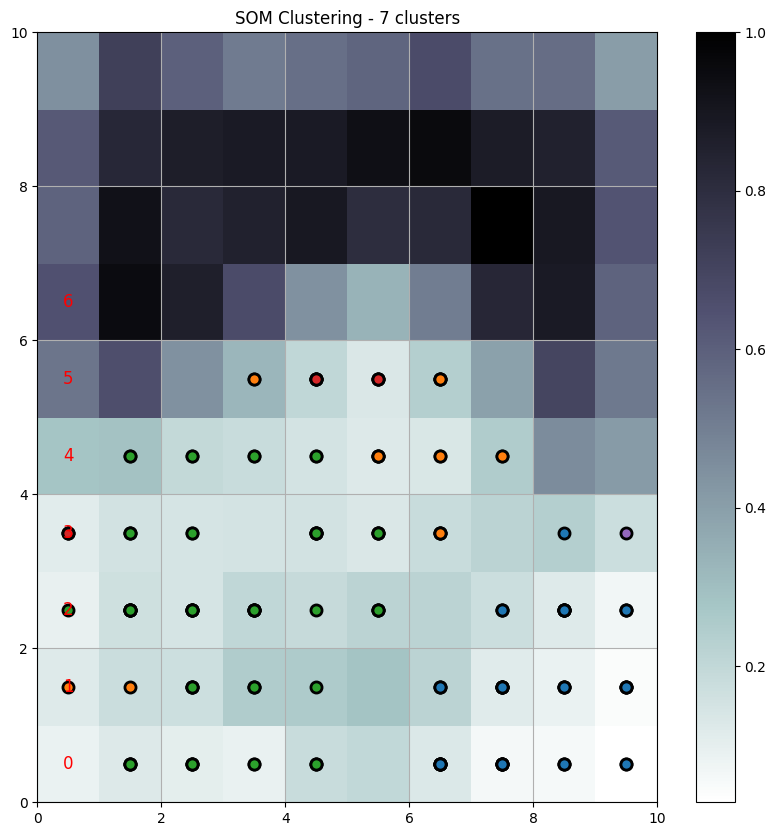

Cluster centroids for 8 clusters:
[[ 0.04285726 -0.98320835 -0.00313771  0.1763619 ]
 [-0.5493992  -0.20244662 -0.46585843 -0.65569753]
 [-0.40744545 -0.42753289 -0.1749657   0.5351658 ]
 [ 0.1418943   0.38842766  0.01163995  0.15683988]
 [ 0.12462778  0.42321017  0.06756868  0.01399209]
 [ 0.17229765  0.44059724  0.08585252  0.03277024]
 [ 0.16682725  0.48491824  0.08203274  0.04611007]
 [ 0.13711757  0.4362671   0.08420974  0.06529501]]
Cluster labels for 8 clusters:
[6 5 6 7 6 6 6 6 4 5 6 6 4 4 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 7 6 6 6 5 6 6
 6 4 6 6 3 4 6 6 7 6 6 6 6 6 6 6 3 3 3 6 3 5 3 3 3 3 3 3 6 3 7 3 3 3 3 3 7
 3 3 5 3 3 3 3 3 3 3 3 6 6 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3
 3 3 3 3 3 3 6 3 3 3 3 5 3 3 6 3 3 3 5 3 6 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


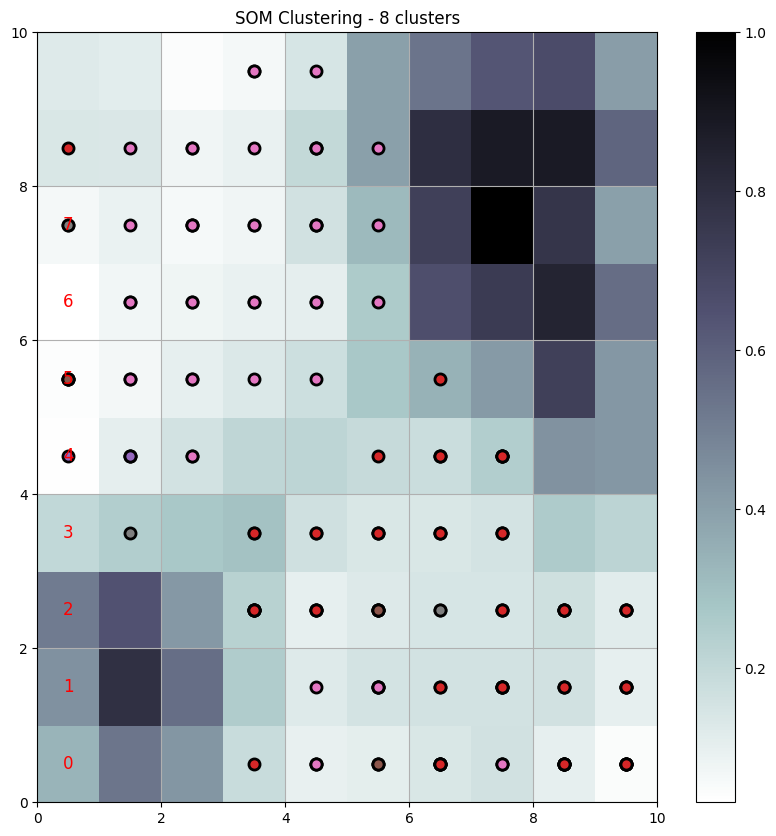

Cluster centroids for 9 clusters:
[[ 0.2987646   0.68800067  0.22391951  0.16505867]
 [ 0.26446541  0.84594177  0.08602258  0.02728027]
 [ 0.36672676  0.90837862  0.06661899  0.06858243]
 [ 0.34039393  0.77650893  0.093813    0.10433956]
 [ 0.2197934   0.56221804  0.07645769  0.14030741]
 [ 0.69863093  0.14815252 -0.23084092 -0.09537564]
 [-0.2857302   0.59603053  0.51002466  0.51388756]
 [-0.35090422 -0.52781787 -0.53868622  0.52426356]
 [-0.30414316  0.74777094  0.47428303 -0.33901265]]
Cluster labels for 9 clusters:
[4 4 4 4 4 3 4 4 4 4 3 4 4 4 2 2 3 4 3 1 4 3 4 4 4 4 4 4 4 4 4 4 1 2 4 4 4
 4 4 4 4 4 4 4 0 4 1 4 3 4 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 6 6 0 0 0 0 6 0 0 0 0
 0 0 6 6 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 6 0 0 0 0 0
 6 0]


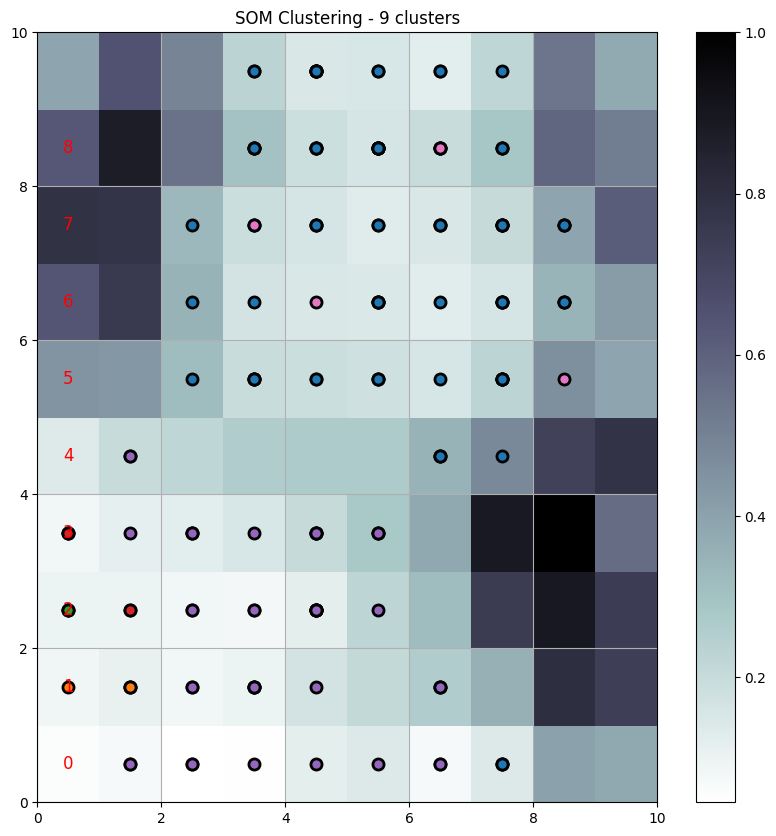

Cluster centroids for 10 clusters:
[[0.59406064 0.31972214 0.77088192 0.81072724]
 [0.41756789 0.29841065 0.68782977 0.80012401]
 [0.52083139 0.15904819 0.64193296 0.55819042]
 [0.33568576 0.18412001 0.49686494 0.4556016 ]
 [0.20634828 0.13661878 0.38681972 0.39272343]
 [0.1719905  0.3902704  0.20768344 0.20384751]
 [0.09995808 0.50151615 0.07580296 0.04215365]
 [0.0603292  0.47625962 0.06648601 0.04007844]
 [0.02551028 0.40308814 0.04578985 0.03010493]
 [0.01815969 0.19778077 0.04477758 0.08756372]]
Cluster labels for 10 clusters:
[6 6 6 7 6 6 6 6 8 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 8 6 6 9 7 6 6 6 6 6 6 6 0 0 0 3 2 3 0 4 2 3 4 2 3 2 3 2 1 3 2 3 1 3 2 2
 2 2 2 0 2 3 3 3 3 2 3 1 0 2 3 3 3 2 3 4 3 3 3 2 4 3 0 1 0 0 0 0 3 0 0 0 0
 0 0 1 1 0 0 0 0 2 0 1 0 0 0 0 1 1 0 0 0 0 0 2 2 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]


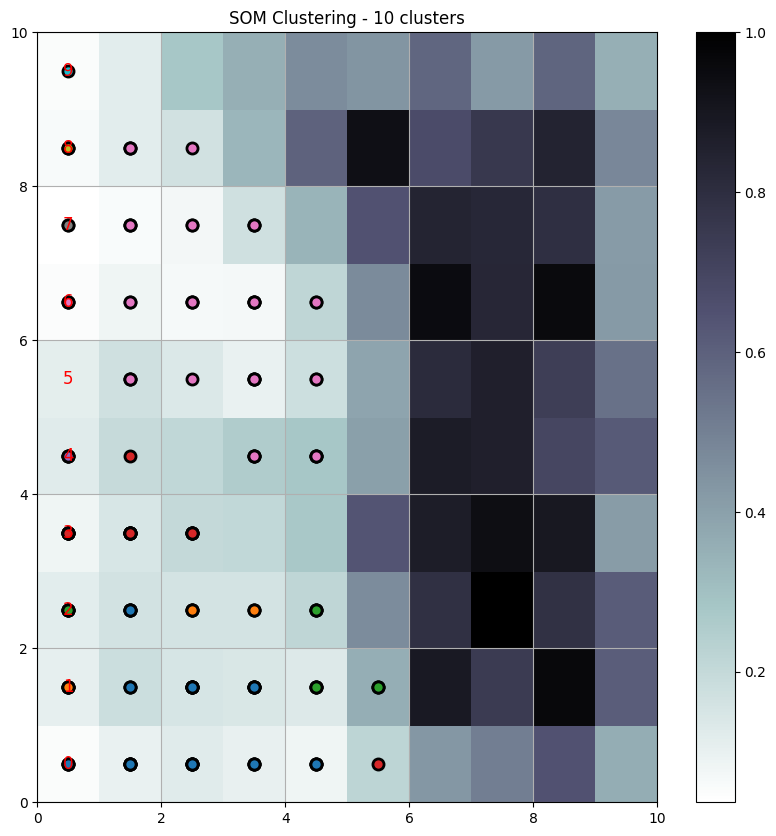

In [9]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# SOM grid size
grid_size = (10, 10)  # Adjust grid size as needed

# Number of clusters to try
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    # Initialize the SOM
    som = MiniSom(grid_size[0], grid_size[1], X.shape[1], sigma=1.0, learning_rate=0.5)

    # Train the SOM
    som.train_batch(X_normalized, 1000)

    # Get cluster centroids (approximation using SOM weights)
    cluster_centroids = som.get_weights().reshape(-1, X.shape[1])

    # Assign cluster labels to each data point
    cluster_labels = np.zeros(len(X_normalized), dtype=int)
    for i, x in enumerate(X_normalized):
        cluster_labels[i] = np.argmin([np.linalg.norm(x - w) for w in cluster_centroids[:n_clusters]])

    # Print cluster centroids
    print("Cluster centroids for", n_clusters, "clusters:")
    print(cluster_centroids[:n_clusters])

    # Print cluster labels
    print("Cluster labels for", n_clusters, "clusters:")
    print(cluster_labels)

    # Plot the SOM grid and cluster centroids
    plt.figure(figsize=(10, 10))
    plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plot distance map
    plt.colorbar()

    # Plot data points
    for i, x in enumerate(X_normalized):
        w = som.winner(x)
        plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.tab10(cluster_labels[i]),
                 markeredgecolor='k', markersize=8, markeredgewidth=2)

    # Plot cluster centroids
    for i, cc in enumerate(cluster_centroids[:n_clusters]):
        w = som.winner(cc)
        plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color='r', fontsize=12, ha='center', va='center')

    plt.title('SOM Clustering - ' + str(n_clusters) + ' clusters')
    plt.grid()
    plt.show()


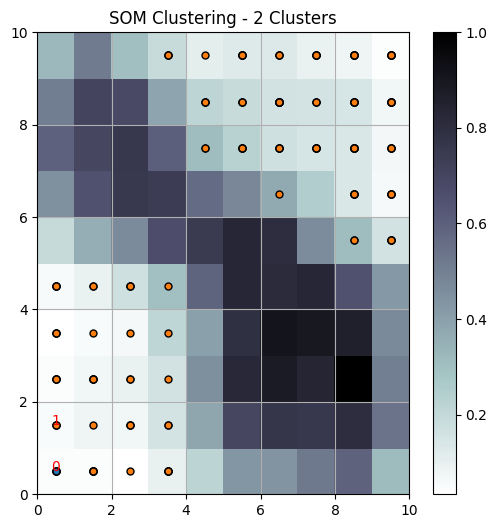

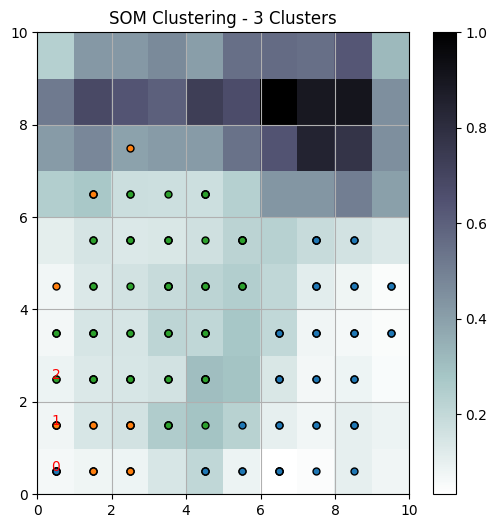

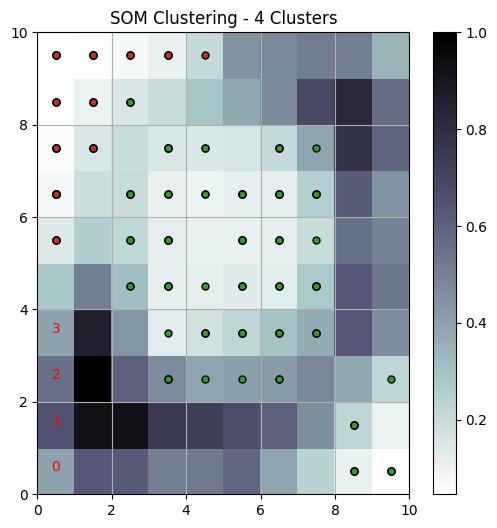

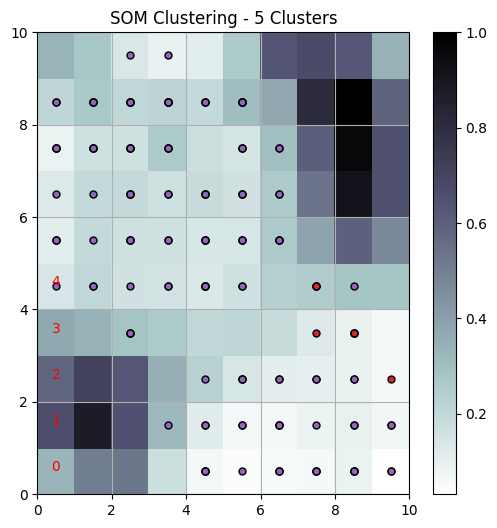

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Load and normalize Iris data
X = MinMaxScaler().fit_transform(load_iris().data)
grid_size = (10, 10)
n_clusters_range = range(2, 6)  # Smaller range for speed

for n in n_clusters_range:
    som = MiniSom(*grid_size, X.shape[1], sigma=1.0, learning_rate=0.5)
    som.train_batch(X, 1000)

    weights = som.get_weights().reshape(-1, X.shape[1])
    labels = [np.argmin([np.linalg.norm(x - w) for w in weights[:n]]) for x in X]

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    for i, x in enumerate(X):
        w = som.winner(x)
        plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', color=plt.cm.tab10(labels[i]), markeredgecolor='k', markersize=5)

    for i in range(n):
        w = som.winner(weights[i])
        plt.text(w[0] + 0.5, w[1] + 0.5, str(i), color='red', fontsize=10, ha='center')

    plt.title(f'SOM Clustering - {n} Clusters')
    plt.grid()
    plt.show()
